In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df_movie=pd.read_csv('C:\\Users\\admin\\OneDrive\\Desktop\\IMDb Movies India.csv')

In [31]:
print(df_movie)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   90 min   Drama, Musical   
3                                 #Yaaram -2019.0  110 min  Comedy, Romance   
4                       ...And Once Again -2010.0  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga -1988.0      NaN           Action   
15505                               Zulmi -1999.0  129 min    Action, Drama   
15506                           Zulmi Raj -2005.0      NaN           Action   
15507                       Zulmi Shikari -1988.0      NaN           Action   
15508                        Zulm-O-Sitam -1998.0  130 min    Action, Drama   

       Rating Votes            Director           A

In [32]:
df_movie.shape

(15509, 10)

In [33]:
df_movie.describe()

Year       Rating
count  14980.000000  7919.000000
mean   -1987.012350     5.842758
std       25.417532     1.384783
min    -2022.000000     1.100000
25%    -2009.000000     4.900000
50%    -1991.000000     6.000000
75%    -1968.000000     6.800000
max    -1913.000000    14.000000

In [34]:
df_movie.isna().sum()

Name           0
Year         529
Duration    8268
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2385
Actor 3     3153
dtype: int64

In [35]:
df_movie.tail()

Name    Year Duration          Genre  Rating Votes  \
15504  Zulm Ko Jala Doonga -1988.0      NaN         Action     4.6    11   
15505                Zulmi -1999.0  129 min  Action, Drama     4.5   655   
15506            Zulmi Raj -2005.0      NaN         Action     NaN   NaN   
15507        Zulmi Shikari -1988.0      NaN         Action     NaN   NaN   
15508         Zulm-O-Sitam -1998.0  130 min  Action, Drama     6.2    20   

            Director           Actor 1         Actor 2        Actor 3  
15504  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505     Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506     Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507            NaN               NaN             NaN            NaN  
15508   K.C. Bokadia        Dharmendra      Jaya Prada    Arjun Sarja

In [36]:
df_movie.duplicated().sum()

np.int64(6)

In [37]:
import os

In [38]:
import matplotlib.pyplot as plt

<Axes: xlabel='Rating', ylabel='count'>

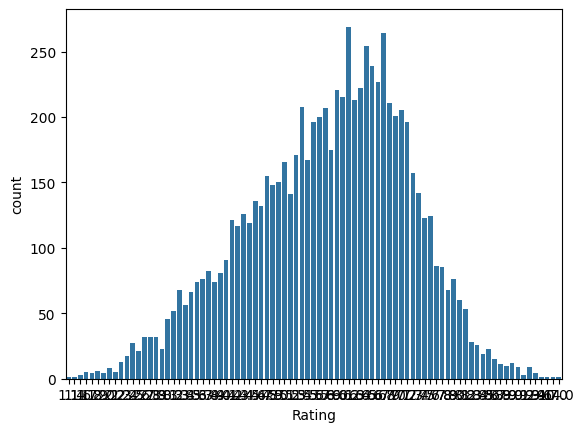

In [42]:
import seaborn as sns
sns.countplot(x="Rating",data=df_movie)

<Axes: xlabel='Year', ylabel='count'>

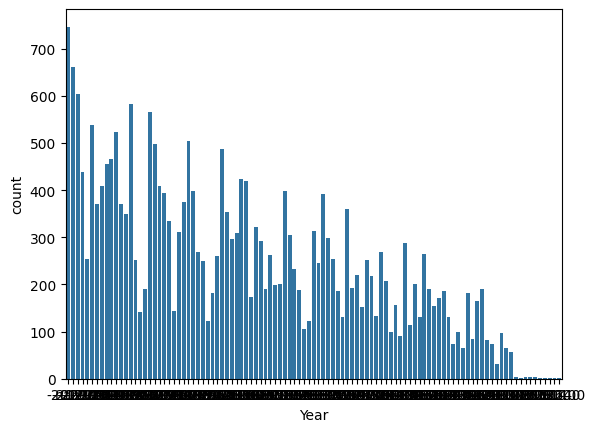

In [120]:
sns.countplot(x='Year',data=df_movie)

In [47]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14980 non-null  float64
 2   Duration  7241 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12356 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [55]:
df_movie['Duration']= pd.to_numeric(df_movie['Duration'].str.replace(' min',''),errors='coerce')

In [62]:
df_movie['Genre']=df_movie['Genre'].str.split(',')

In [64]:
df_movie=df_movie.explode('Genre')

In [65]:
df_movie['Genre'].fillna(df_movie['Genre'].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_44128\3406572324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movie['Genre'].fillna(df_movie['Genre'].mode()[0],inplace=True)


In [70]:
df_movie['Votes']=pd.to_numeric(df_movie['Votes'].str.replace(' ,',''),errors='coerce')

In [71]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24949 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      24949 non-null  object 
 1   Year      24949 non-null  object 
 2   Duration  14168 non-null  float64
 3   Genre     24949 non-null  object 
 4   Rating    15836 non-null  float64
 5   Votes     12329 non-null  float64
 6   Director  24407 non-null  object 
 7   Actor 1   23166 non-null  object 
 8   Actor 2   22275 non-null  object 
 9   Actor 3   21408 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.1+ MB


In [75]:
pip install plotly

In [90]:
import plotly.express as px
import plotly.offline as poy
poy.init_notebook_mode(connected=True)
year=px.histogram(df_movie,x='Year',histnorm='probability density',nbins=30)

In [92]:
avg_rating_by_year=df_movie.groupby(['Year','Genre'])['Rating'].mean().reset_index()

In [93]:
top_genres=df_movie['Genre'].value_counts().head(10).index

In [94]:
average_rating_by_year=avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

In [95]:
fig=px.line(avg_rating_by_year,x='Year',y='Rating',color="Genre")

In [96]:
fig.update_layout(title='Average Rating by Year for Top Genres',xaxis_title='Year',yaxis_title='Average Rating')

In [98]:
from sklearn.model_selection import train_test_split,cross_val_score

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [107]:
x=df_movie[['Year','Votes','Duration','Genre','Director','Actor 1','Actor 2','Actor 3']]
y=df_movie['Rating']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
Model=LinearRegression()


In [112]:
x.head(5)

Year  Votes  Duration     Genre            Director       Actor 1  \
0      nan    NaN       NaN     Drama       J.S. Randhawa      Manmauji   
1  -2019.0    8.0     109.0     Drama       Gaurav Bakshi  Rasika Dugal   
2  -2021.0    NaN      90.0     Drama  Soumyajit Majumdar  Sayani Gupta   
2  -2021.0    NaN      90.0   Musical  Soumyajit Majumdar  Sayani Gupta   
3  -2019.0   35.0     110.0    Comedy          Ovais Khan       Prateik   

             Actor 2          Actor 3  
0             Birbal  Rajendra Bhatia  
1     Vivek Ghamande    Arvind Jangid  
2  Plabita Borthakur       Roy Angana  
2  Plabita Borthakur       Roy Angana  
3         Ishita Raj  Siddhant Kapoor

In [113]:
y.head(5)

0    NaN
1    7.0
2    NaN
2    NaN
3    4.4
Name: Rating, dtype: float64

In [114]:
data={'Year':[2019],'Votes':[111]}
trail=pd.DataFrame(data)

predicted rating:4.207458962134328
